# Importing the libraries

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

# Importing Dataset 

In [3]:
census = pd.read_csv('census.csv')
census.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,?,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
census.columns

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [5]:
print("Shape of the Dataframe:", census.shape)

Shape of the Dataframe: (32561, 14)


# Variable transformation

#### Coverting '?' symbol with nan

In [6]:
census.replace('?', np.nan, inplace = True)

In [7]:
print('Summary Of the dataframe:\n')
print(census.info(),'\n')

Summary Of the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32556 non-null  object
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital.gain    32561 non-null  int64 
 10  capital.loss    32561 non-null  int64 
 11  hours.per.week  32556 non-null  object
 12  native.country  31978 non-null  object
 13  income          32561 non-null  object
dtypes: int64(3), object(11)
memory usage: 3.5+ MB
None 



# Filling all the missing values

#### Coverting the datatype of "age", "hours.per.week" 

In [8]:
census['age'] = census['age'].astype('float')
census['hours.per.week'] = census['hours.per.week'].astype("float")

In [9]:
print('Summary Of the dataframe:\n')
print(census.info(),'\n')

Summary Of the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32556 non-null  float64
 1   workclass       30725 non-null  object 
 2   education       32561 non-null  object 
 3   education.num   32561 non-null  int64  
 4   marital.status  32561 non-null  object 
 5   occupation      30718 non-null  object 
 6   relationship    32561 non-null  object 
 7   race            32561 non-null  object 
 8   sex             32561 non-null  object 
 9   capital.gain    32561 non-null  int64  
 10  capital.loss    32561 non-null  int64  
 11  hours.per.week  32556 non-null  float64
 12  native.country  31978 non-null  object 
 13  income          32561 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 3.5+ MB
None 



#### Replace missing numerical value with median and then change the datatype from float to int

In [10]:
census['age'] = census['age'].fillna(census['age'].median())
census['hours.per.week'] = census['hours.per.week'].fillna(census['hours.per.week'].median())

In [11]:
census['age'] = census['age'].astype('int')
census['hours.per.week'] = census['hours.per.week'].astype("int")

In [12]:
print('Summary Of the dataframe:\n')
print(census.info(),'\n')

Summary Of the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int32 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital.gain    32561 non-null  int64 
 10  capital.loss    32561 non-null  int64 
 11  hours.per.week  32561 non-null  int32 
 12  native.country  31978 non-null  object
 13  income          32561 non-null  object
dtypes: int32(2), int64(3), object(9)
memory usage: 3.2+ MB
None 



### Now filling all the missing categorical values with the values whose frequency is  greater 

In [13]:

census['workclass'].replace(np.nan, census['workclass'].value_counts().idxmax() , inplace=True)
census['occupation'].replace(np.nan, census['occupation'].value_counts().idxmax() , inplace=True)
census['native.country'].replace(np.nan, census['native.country'].value_counts().idxmax() , inplace=True)

In [14]:
print('Checking for Null values in the dataframe:\n',census.isnull().sum(),'\n')

Checking for Null values in the dataframe:
 age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64 



# Analyzing data

In [15]:
census.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581217,13.63944,17.0,28.0,37.0,48.0,90.0
workclass,32561,8,Private,24532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education.num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital.status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,14,Prof-specialty,5983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital.gain,32561.0,NaN,NaN,NaN,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0


<ol>
    <li><b>age:</b> This represent age of the person. Minimum age of the person is 17 and maximum is 90. As mean > median, it's <b>rightly skewed</b>.</li>
    <li><b>workclass:</b> This column represent the sector in which a person work. It has 8 unique values. And mostly people worked in <b>private sector </b>(24532)</li>
    <li><b>Education:</b> This column represent the education of a person. It has 16 unique values. And mostly people are <b>HS-grad </b>(10501)</li>
    <li><b>education.number:</b> Level of education range from 1 - 16. As Mean slightly > Median, it's <b>slightly rightly skewed.</b></li>
    <li><b>marital.status:</b> The column represent the marital status of a person. It has 7 unique values. And mostly people are <b>Married-civ-spouse </b>(14976)</li>
    <li><b>occupation:</b> The column represent the occupation of a person. It has 14 unique values. And mostly people are <b>Prof-specialty </b>(5983)</li>
    <li><b>relationship:</b> The column represent the relationship of a person in family. It has 6 unique values. And mostly people are <b>Husband </b>(13193)</li>
    <li><b>race:</b> The column represent the race of a person. It has 5 unique values. And mostly people are of <b>White race</b>(27816)</li>
    <li><b>sex:</b> The column represent the gender of a person. It has 2 unique values. And mostly people are <b>Male </b>(21790)</li>
    <li><b>capital.gain:</b> Capital gain by a person from 0 - 99999. As Mean highlty > Median, it's <b>Highly rightly skewed.</b></li>
    <li><b>capital.loss:</b> Capital loss by a person from 0 - 4356. As Mean highlty > Median, it's <b>Highly rightly skewed.</b></li>
    <li><b>hours.per.week:</b> This represent the working hours of the person in a week. Minimum working hours by the person is 1 and maximum is 99. As Mean slightly > Median, it's <b>slightly rightly skewed.</b></li>
    <li><b>native.country:</b> The column represent the native country of a person. It has 41 unique values. And mostly people's native country is <b>United-States</b>(29753)</li>
    <li><b>income:</b> Our taget column value is income and we wanted to check whose person like which race, education,etc people have income greater than <b>50K</b> </li>
   
</ol>


# Univariate Analysis - by Boxplot

Text(0.5, 1.0, 'Box Plot Of age')

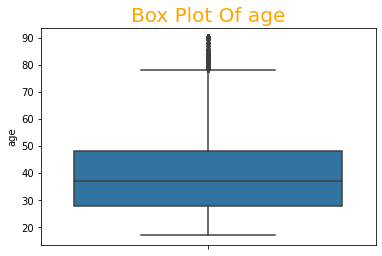

In [16]:
sns.boxplot(y="age", data=census)
plt.title(f"Box Plot Of age" , fontsize=20,
        color="orange")

Text(0.5, 1.0, 'Box Plot Of education.num')

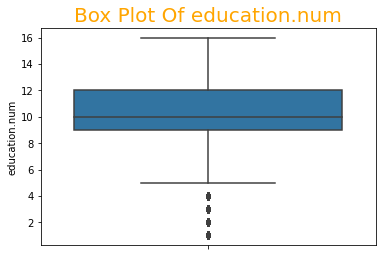

In [17]:
sns.boxplot(y="education.num", data=census)
plt.title(f"Box Plot Of education.num", fontsize=20,
        color="orange")

Text(0.5, 1.0, 'Box Plot Of capital.gain')

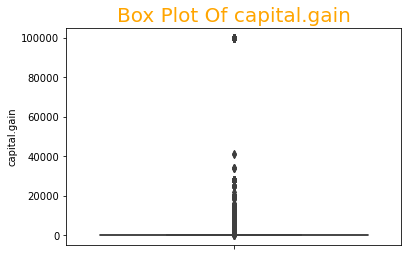

In [18]:
sns.boxplot(y="capital.gain", data=census)
plt.title(f"Box Plot Of capital.gain" , fontsize=20,
        color="orange")

Text(0.5, 1.0, 'Box Plot Of capital.loss')

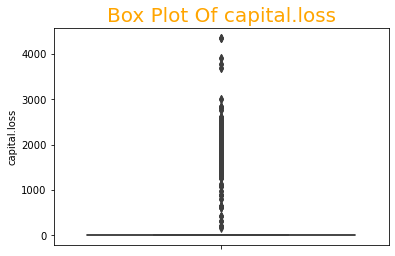

In [19]:
sns.boxplot(y="capital.loss", data=census)
plt.title(f"Box Plot Of capital.loss" , fontsize=20,
        color="orange")

Text(0.5, 1.0, 'Box Plot Of hours.per.week')

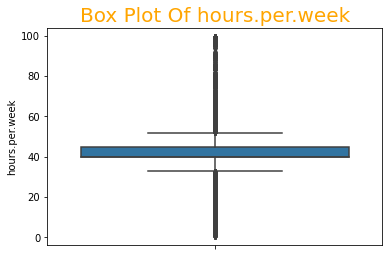

In [20]:
sns.boxplot(y="hours.per.week", data=census)
plt.title(f"Box Plot Of hours.per.week" , fontsize=20,
        color="orange")

In [21]:
census.corr()

,age,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,0.036558,0.077685,0.057786,0.068462
education.num,0.036558,1.000000,0.122630,0.079923,0.147953
capital.gain,0.077685,0.122630,1.000000,-0.031615,0.078417
capital.loss,0.057786,0.079923,-0.031615,1.000000,0.053845
hours.per.week,0.068462,0.147953,0.078417,0.053845,1.000000


Text(0.5, 1.0, 'Analysis of age')

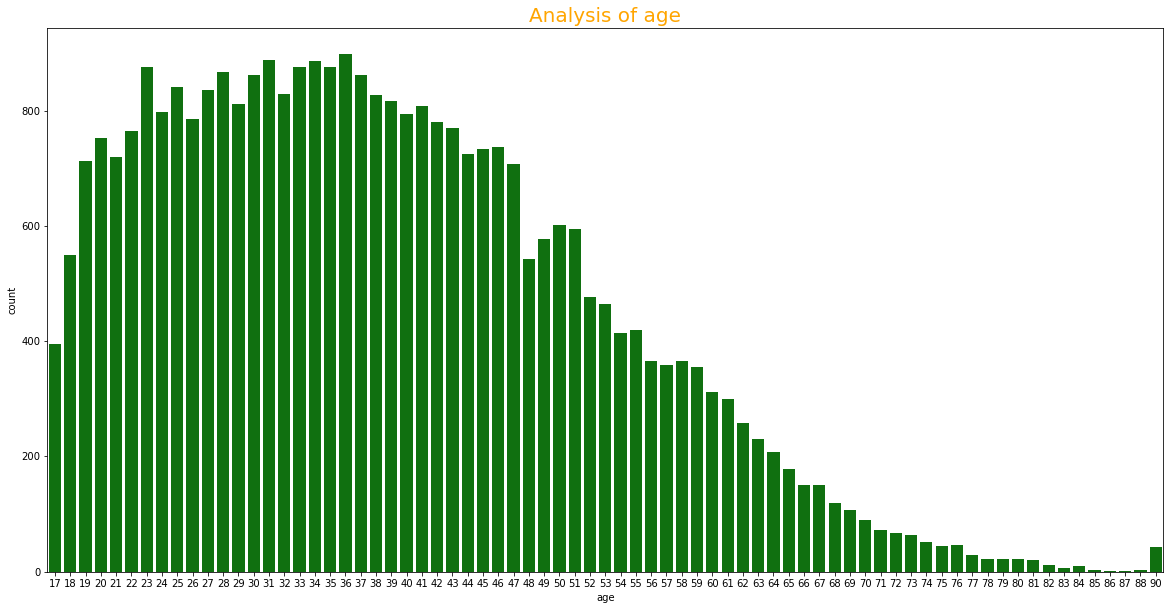

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(census.age,color='green')
plt.title(f"Analysis of age" , fontsize=20,
          color="orange")

mostly people are of age 36

Text(0.5, 1.0, 'Analysis of Education')

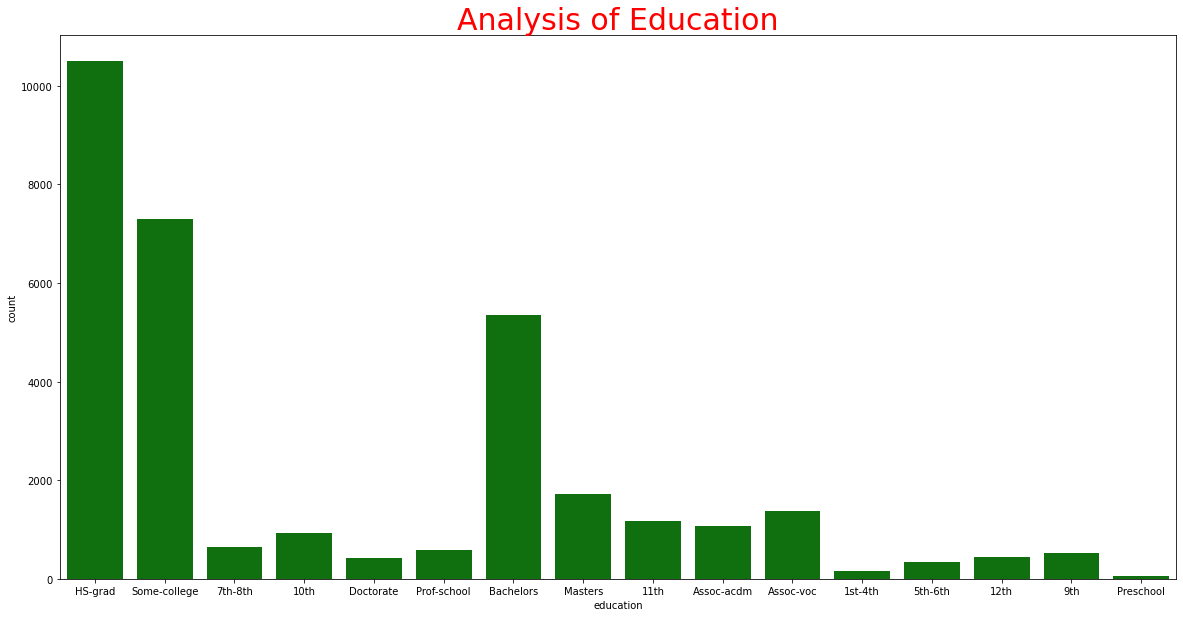

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(census.education,color='green')
plt.title(f"Analysis of Education" , fontsize=30,
          color="red")

Mostly people are high school graduates

Text(0.5, 1.0, 'Analysis of education number')

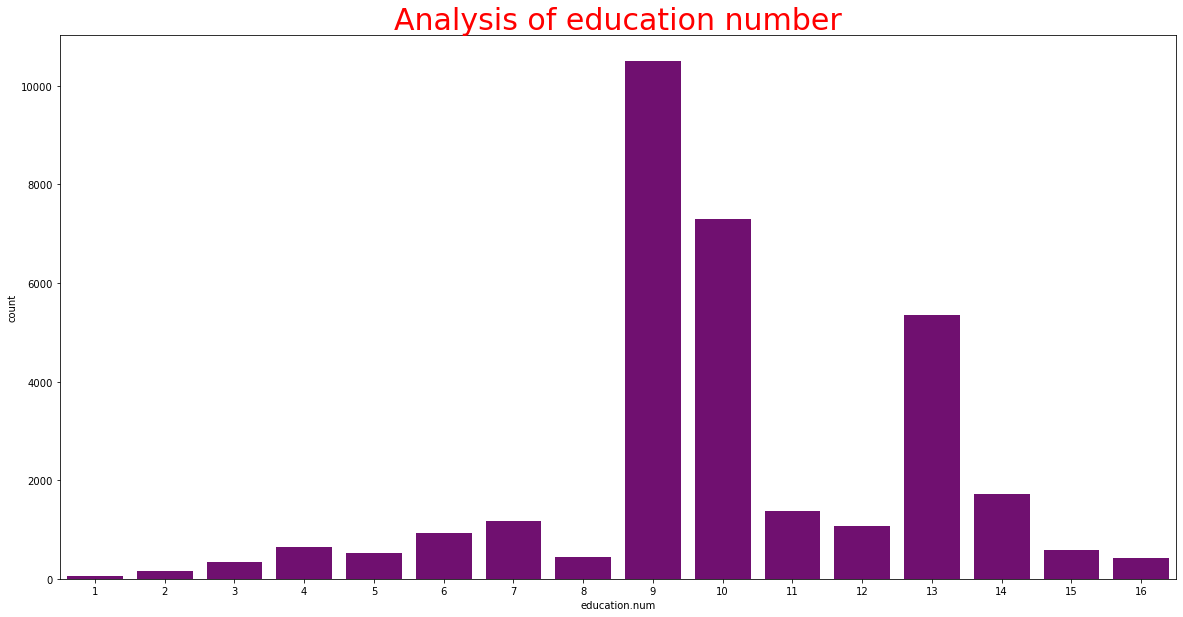

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(census['education.num'],color='purple')
plt.title(f"Analysis of education number" , fontsize=30,
          color="red")

Mostly people education level is 9 which means mostly people are High-School graduates

Text(0.5, 1.0, 'Analysis of workclass')

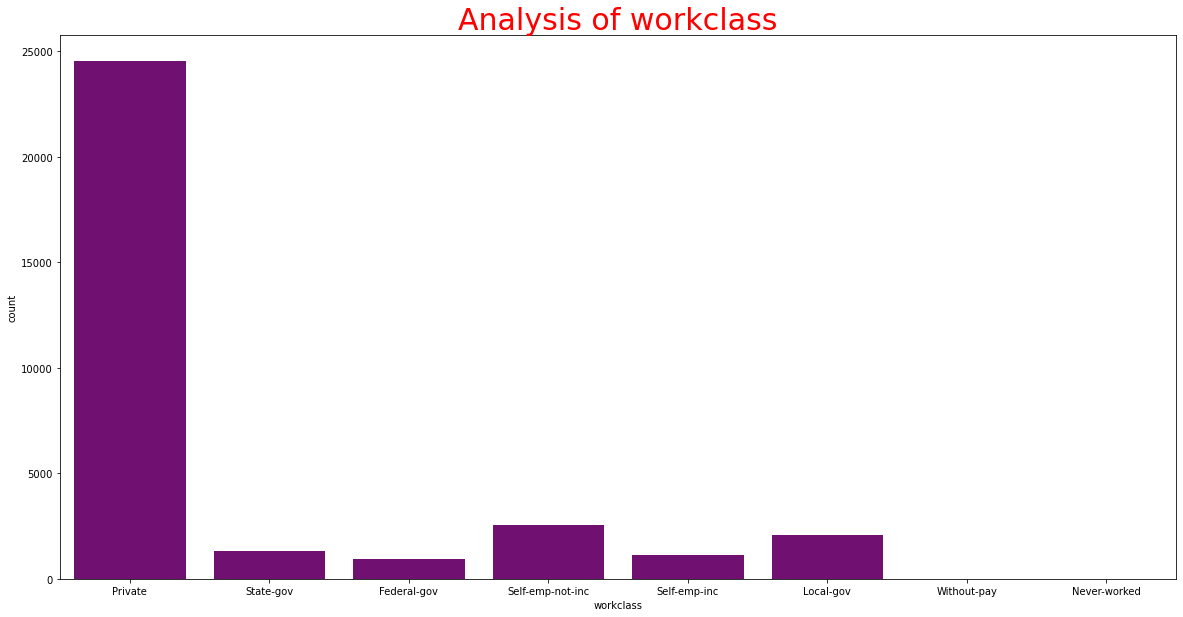

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(census['workclass'],color='purple')
plt.title(f"Analysis of workclass" , fontsize=30,
          color="red")

Mostly people doing jobs in private sectors

Text(0.5, 1.0, 'Analysis of marital.status')

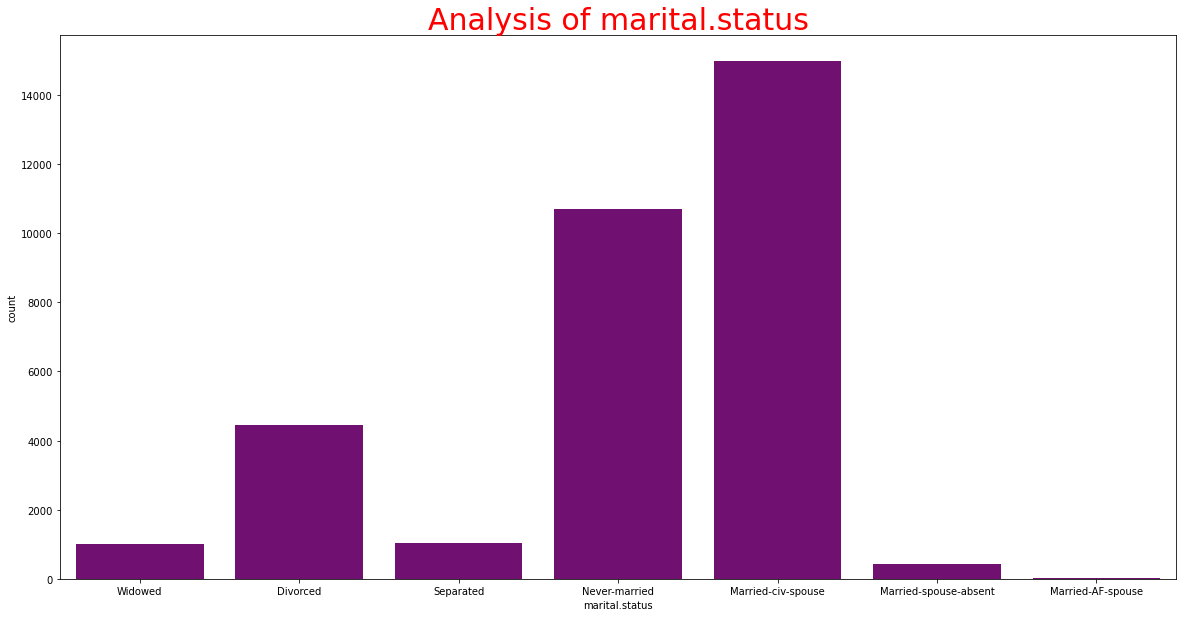

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(census['marital.status'],color='purple')
plt.title(f"Analysis of marital.status" , fontsize=30,
          color="red")

Mostly people are married-civ-spouse

Text(0.5, 1.0, 'Analysis of occupation')

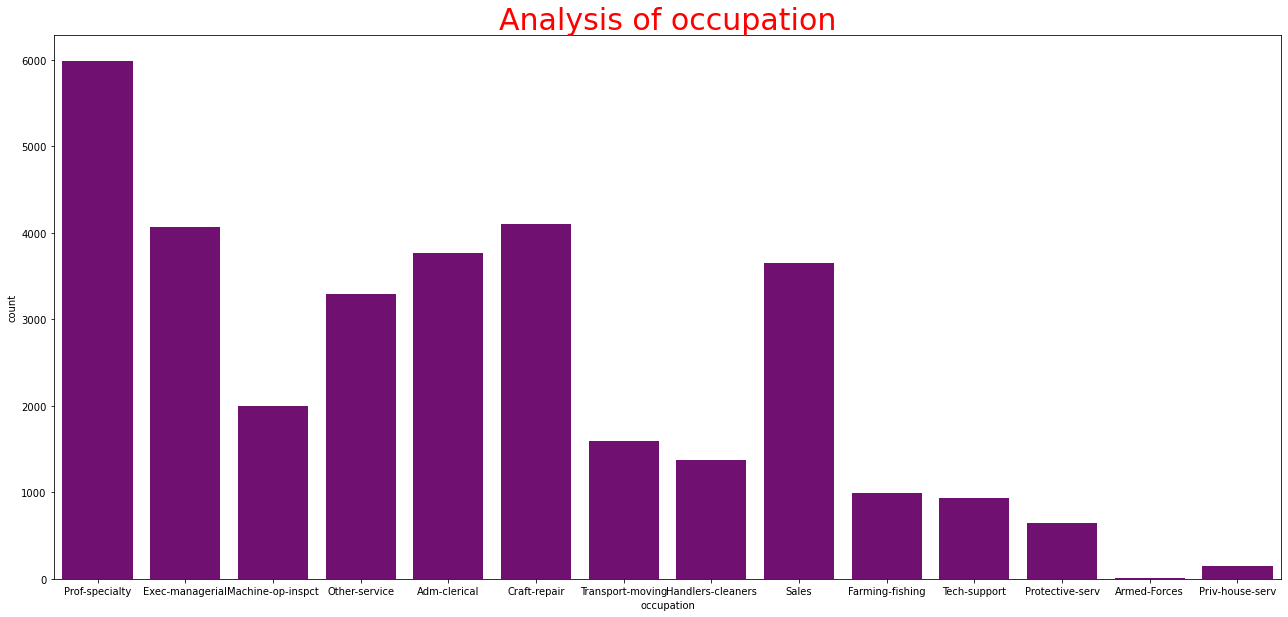

In [27]:
plt.figure(figsize=(22,10))
sns.countplot(census['occupation'],color='purple')
plt.title(f"Analysis of occupation" , fontsize=30,
          color="red")

Mostly people occupation is prof-speciality

Text(0.5, 1.0, 'Analysis of relationship')

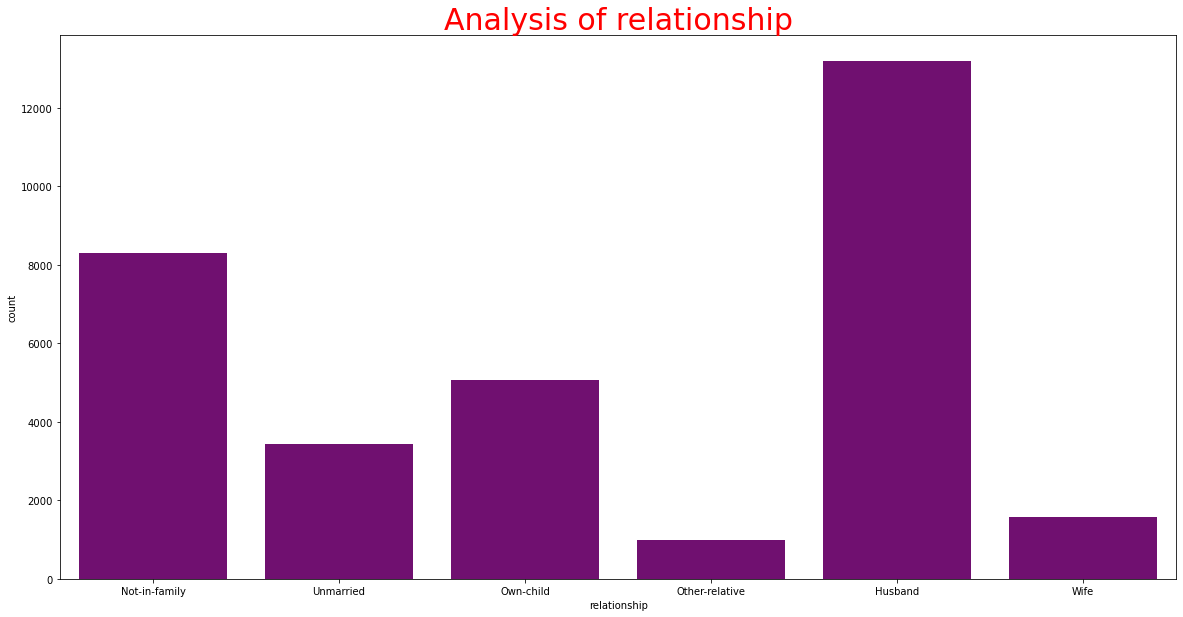

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(census['relationship'],color='purple')
plt.title(f"Analysis of relationship" , fontsize=30,
          color="red")

Moslty people are husbands

Text(0.5, 1.0, 'Analysis of race')

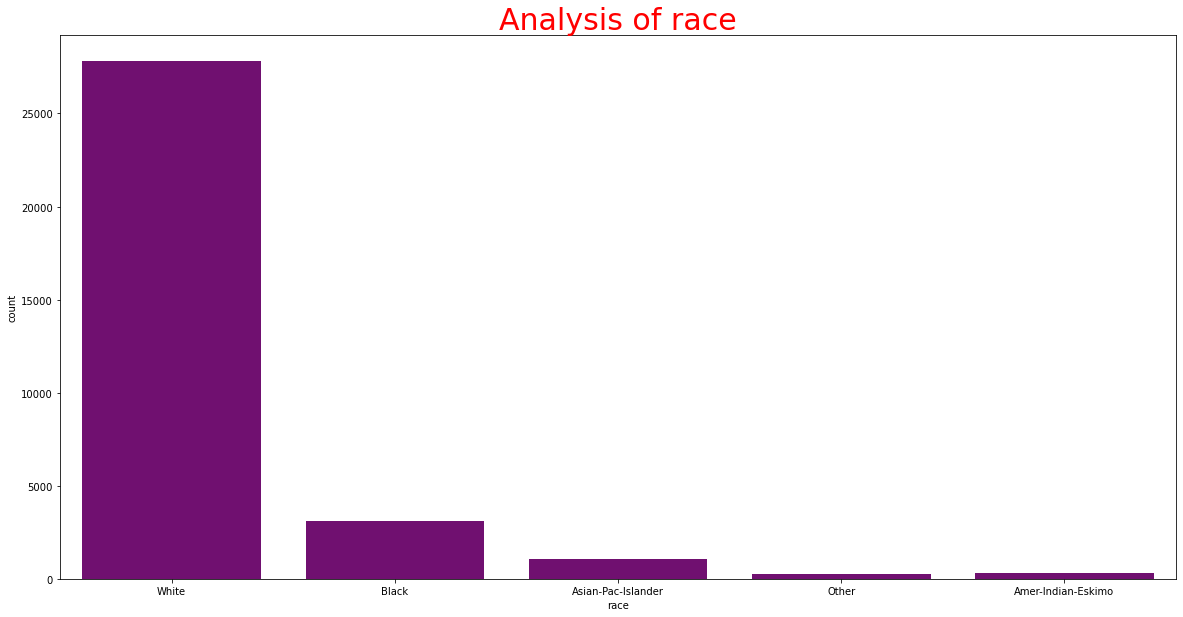

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(census['race'],color='purple')
plt.title(f"Analysis of race" , fontsize=30,
          color="red")

Mostly people are white

Text(0.5, 1.0, 'Analysis of sex')

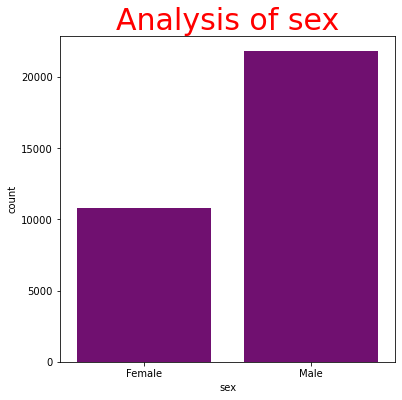

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(census['sex'],color='purple')
plt.title(f"Analysis of sex" , fontsize=30,
          color="red")

Mostly people are male

Text(0.5, 1.0, 'Analysis of capital.gain')

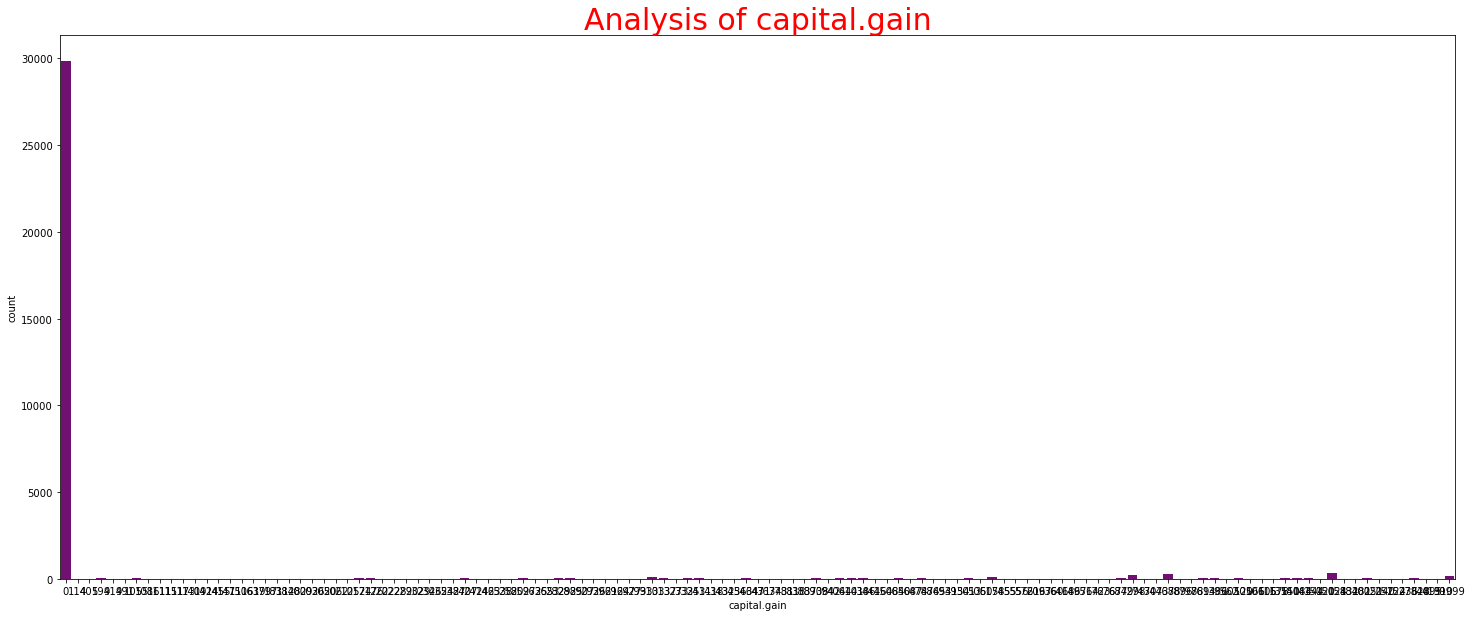

In [31]:
plt.figure(figsize=(25,10))
sns.countplot(census['capital.gain'],color='purple')
plt.title(f"Analysis of capital.gain" , fontsize=30,
          color="red")

Mostly poeple capital gain is 0

Text(0.5, 1.0, 'Analysis of capital loss')

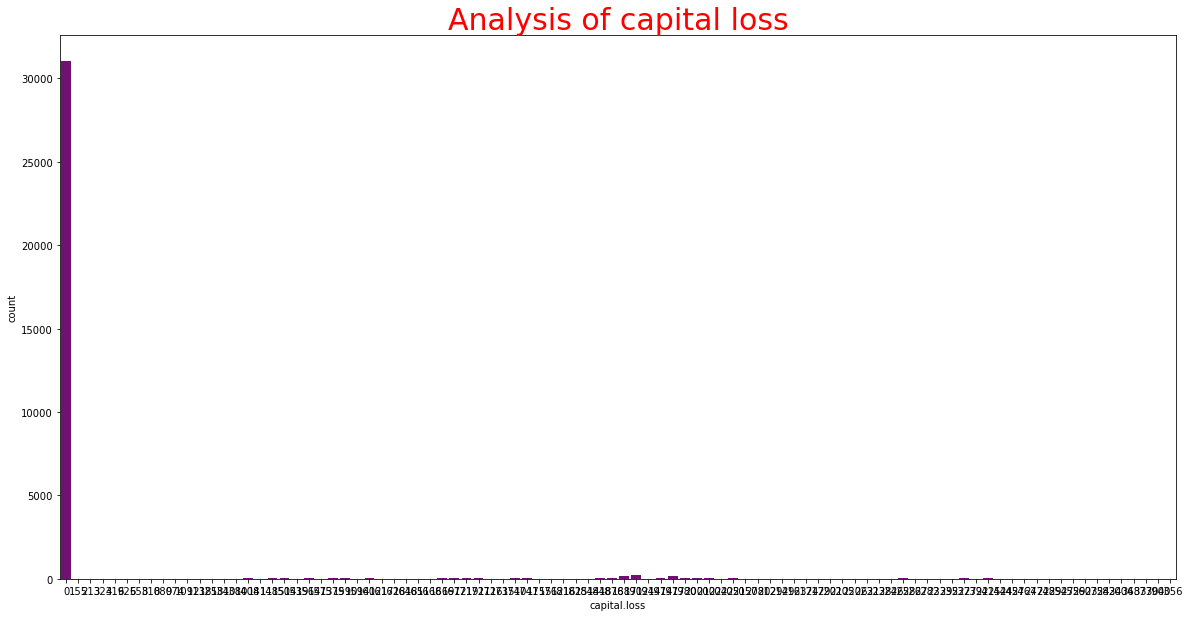

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(census['capital.loss'],color='purple')
plt.title(f"Analysis of capital loss" , fontsize=30,
          color="red")

Mostly people capital loss is 0

Text(0.5, 1.0, 'Analysis of hours per week')

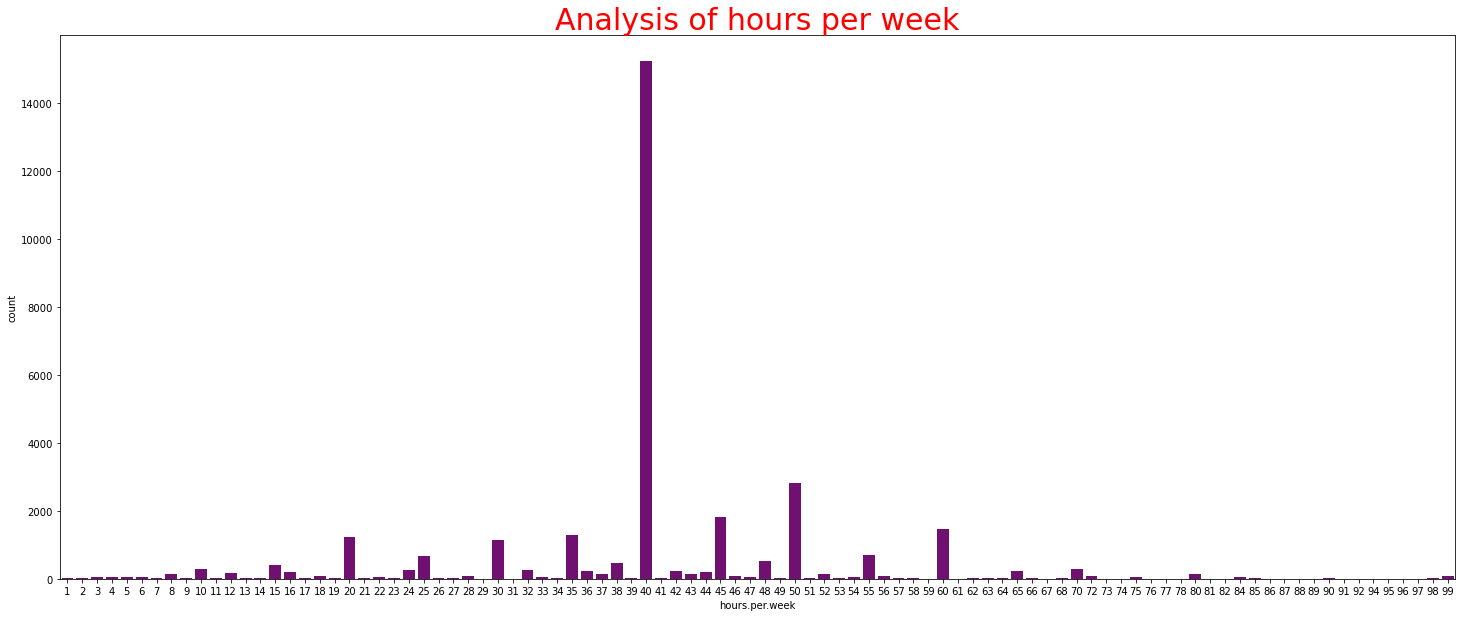

In [33]:
plt.figure(figsize=(25,10))
sns.countplot(census['hours.per.week'],color='purple')
plt.title(f"Analysis of hours per week" , fontsize=30,
          color="red")

Mostly people work 40 hours per week

Text(0.5, 1.0, 'Analysis of native country')

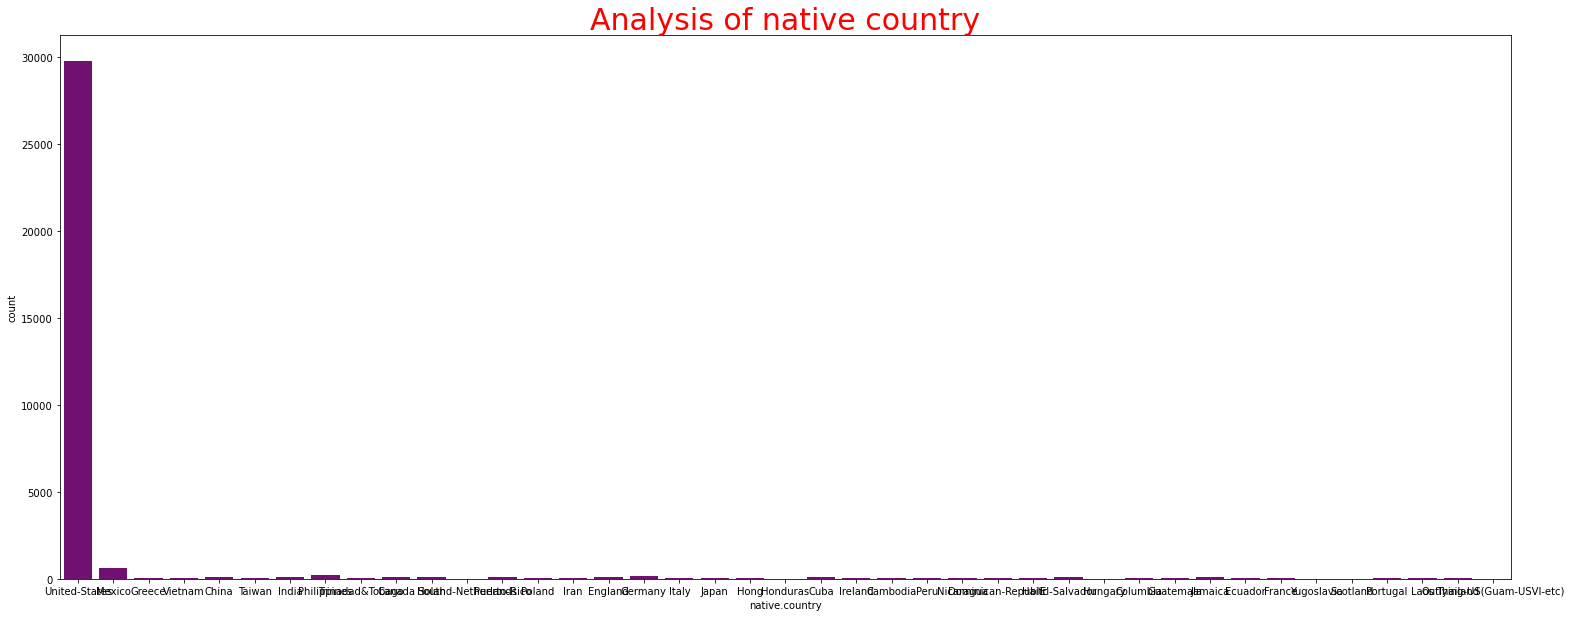

In [34]:
plt.figure(figsize=(26,10))
sns.countplot(census['native.country'],color='purple')
plt.title(f"Analysis of native country" , fontsize=30,
          color="red")

mostly people lived in United-states

Text(0.5, 1.0, 'Analysis of income')

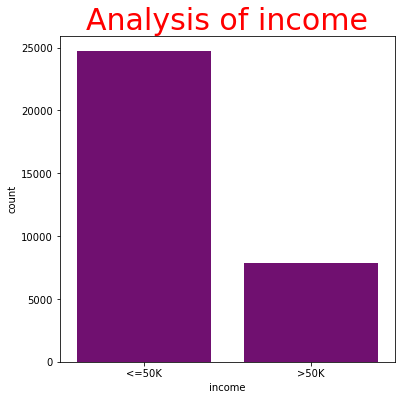

In [35]:
plt.figure(figsize=(6,6))
sns.countplot(census['income'],color='purple')
plt.title(f"Analysis of income" , fontsize=30,
          color="red")

Mostly people income is <=50K

Skewness is : 0.5588983212766524


Text(0.5, 1.0, 'Analysis of age - Skweness')

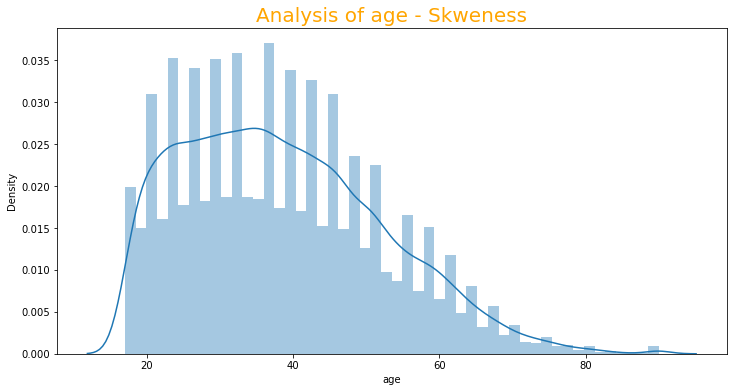

In [36]:
plt.figure(figsize=(12,6))
print("Skewness is :",census.age.skew())
sns.distplot(census.age)
plt.title(f"Analysis of age - Skweness" , fontsize=20,
          color="orange")

Age is rightly skewed

Skewness is : -0.31167586791022966


Text(0.5, 1.0, 'Analysis of education num - Skweness')

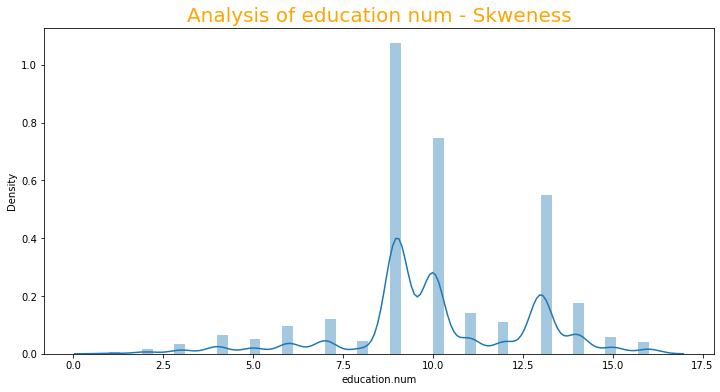

In [37]:
plt.figure(figsize=(12,6))
print("Skewness is :",census['education.num'].skew())
sns.distplot(census['education.num'])
plt.title(f"Analysis of education num - Skweness" , fontsize=20,
          color="orange")

Education number is slightly rightly skewed

Skewness is : 11.953847687699794


Text(0.5, 1.0, 'Analysis of capital gain - Skweness')

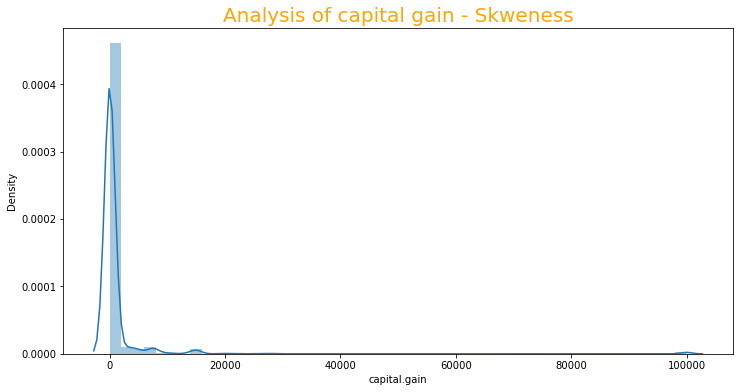

In [38]:
plt.figure(figsize=(12,6))
print("Skewness is :",census['capital.gain'].skew())
sns.distplot(census['capital.gain'])
plt.title(f"Analysis of capital gain - Skweness" , fontsize=20,
          color="orange")

Capital gain is strongly rightly skewed

Skewness is : 4.594629121679696


Text(0.5, 1.0, 'Analysis of capital loss - Skweness')

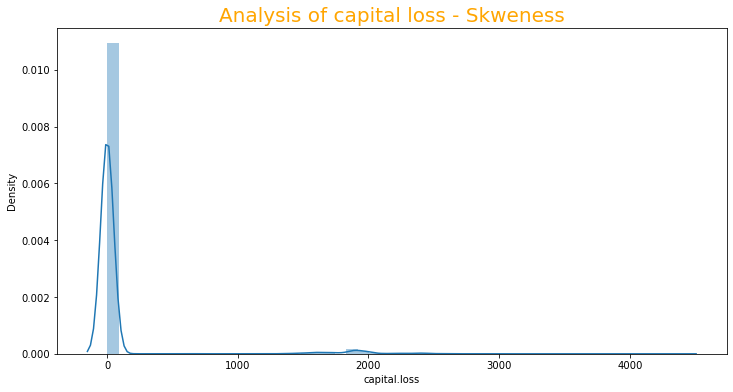

In [39]:
plt.figure(figsize=(12,6))
print("Skewness is :",census['capital.loss'].skew())
sns.distplot(census['capital.loss'])
plt.title(f"Analysis of capital loss - Skweness" , fontsize=20,
          color="orange")

Capital loss is strongly rightly skewed

Skewness is : 0.2278441260001115


Text(0.5, 1.0, 'Analysis of hours per week - Skweness')

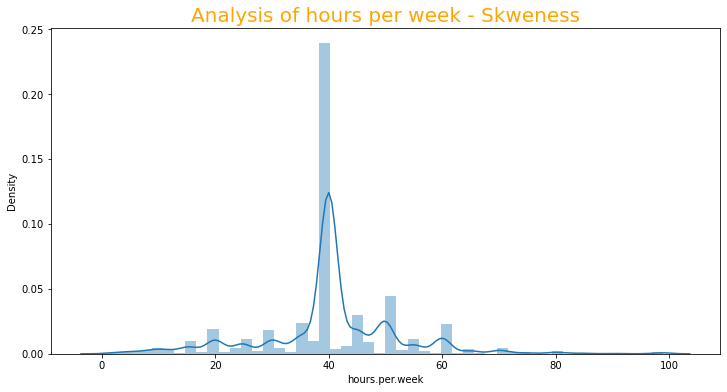

In [40]:
plt.figure(figsize=(12,6))
print("Skewness is :",census['hours.per.week'].skew())
sns.distplot(census['hours.per.week'])
plt.title(f"Analysis of hours per week - Skweness" , fontsize=20,
          color="orange")

Hours per week is slightly rightly skewed

Text(0.5, 1.0, 'Pairplot')

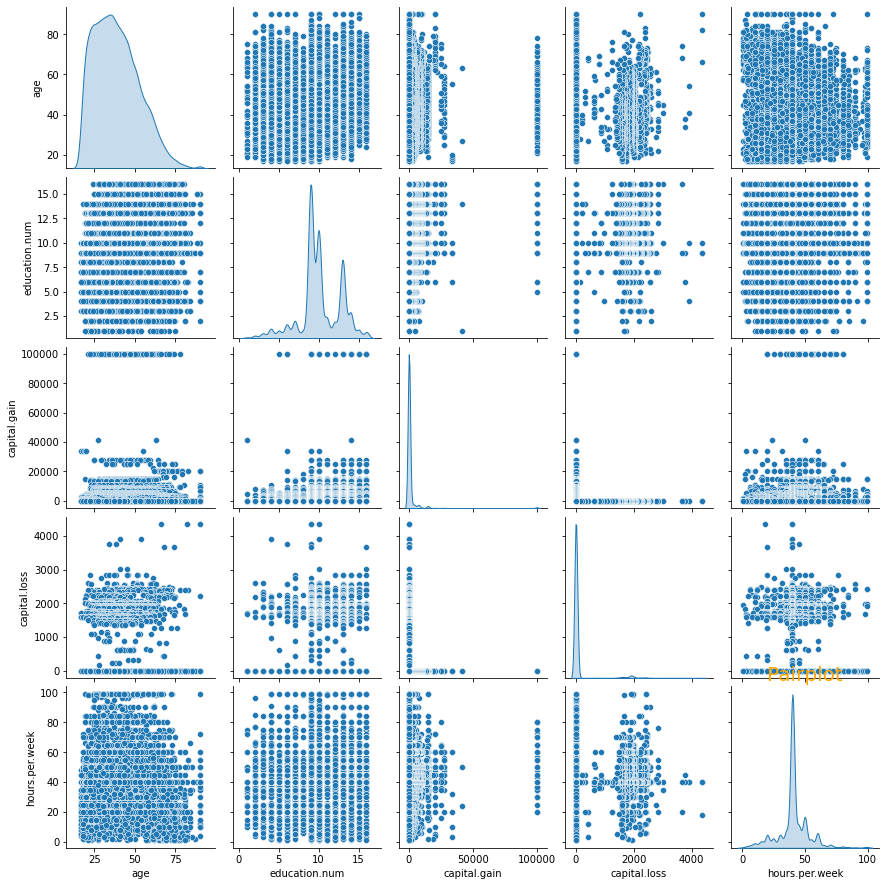

In [41]:
sns.pairplot(census, diag_kind = 'kde')
plt.title(f"Pairplot" , fontsize=20,
          color="orange")

In [43]:
# corelatoin between the different features
corr = census.corr(method ='pearson')
corr

,age,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,0.036558,0.077685,0.057786,0.068462
education.num,0.036558,1.000000,0.122630,0.079923,0.147953
capital.gain,0.077685,0.122630,1.000000,-0.031615,0.078417
capital.loss,0.057786,0.079923,-0.031615,1.000000,0.053845
hours.per.week,0.068462,0.147953,0.078417,0.053845,1.000000


Text(0.5, 1.0, 'Heatmap')

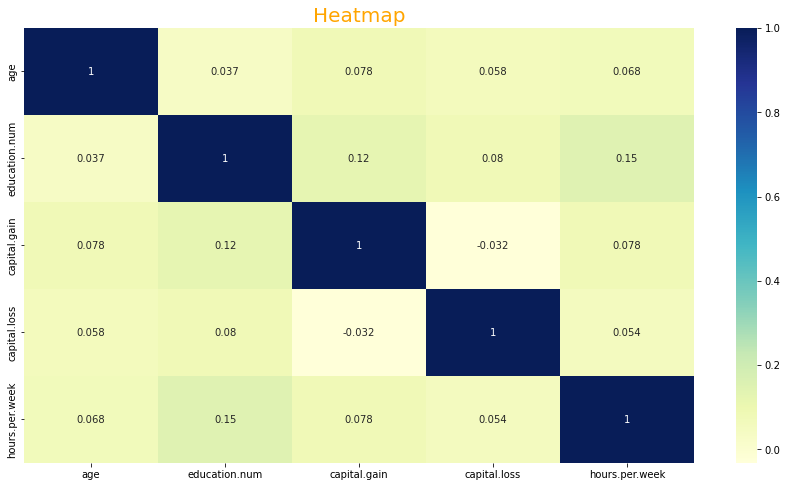

In [44]:
plt.subplots(figsize =(15, 8)) 
sns.heatmap(corr,cmap="YlGnBu",annot=True)
plt.title(f"Heatmap" , fontsize=20,
          color="orange")

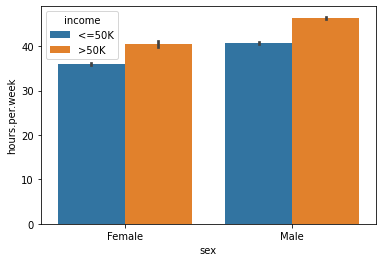

In [59]:
sns.barplot(x='sex',y='hours.per.week', data = census, hue='income')
plt.show()

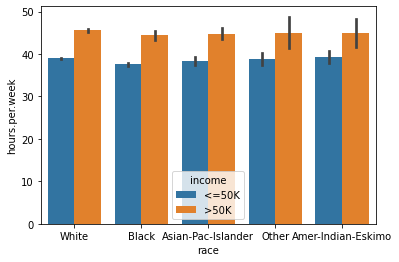

In [61]:
sns.barplot(x='race',y='hours.per.week', data = census, hue='income')
plt.show()

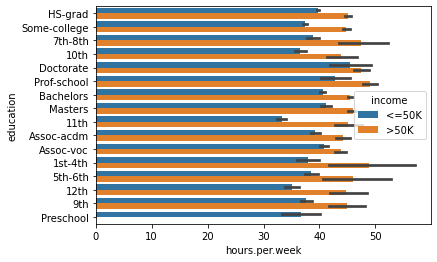

In [71]:

sns.barplot(x='hours.per.week',y='education', data = census, hue='income')
plt.show()

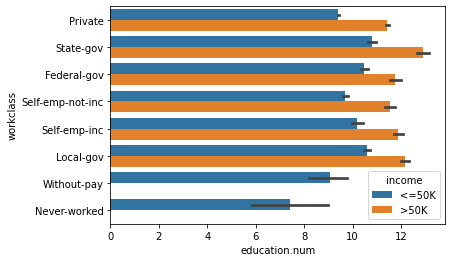

In [72]:
sns.barplot(x='education.num',y='workclass', data = census, hue='income')
plt.show()

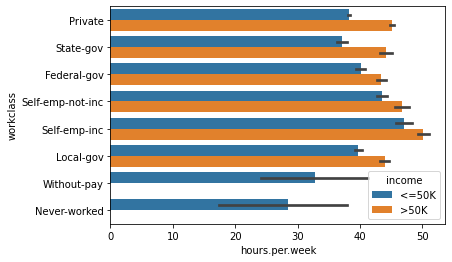

In [73]:
sns.barplot(x='hours.per.week',y='workclass', data = census, hue='income')
plt.show()

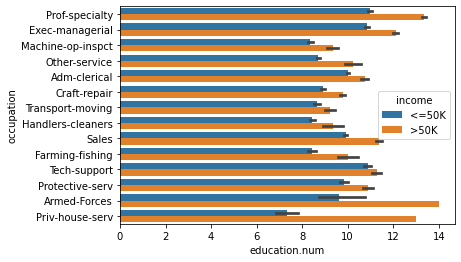

In [74]:
sns.barplot(x='education.num',y='occupation', data = census, hue='income')
plt.show()

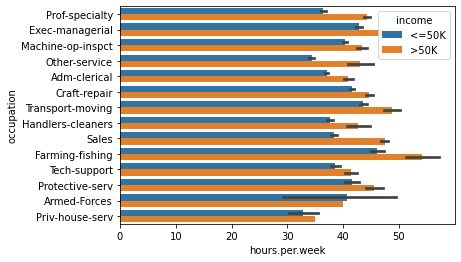

In [75]:
sns.barplot(x='hours.per.week',y='occupation', data = census, hue='income')
plt.show()

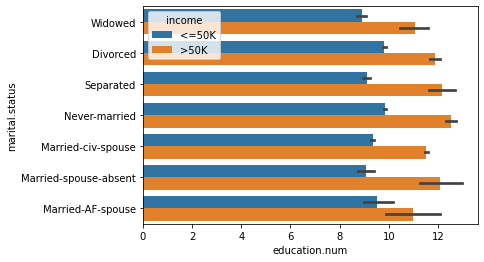

In [76]:
sns.barplot(x='education.num',y='marital.status', data = census, hue='income')
plt.show()

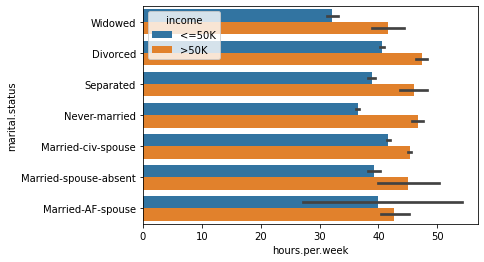

In [77]:
sns.barplot(x='hours.per.week',y='marital.status', data = census, hue='income')
plt.show()

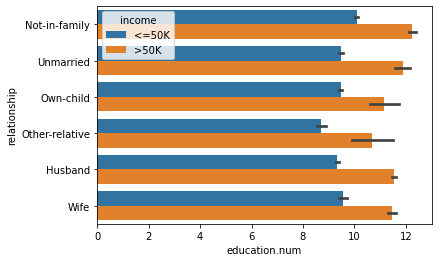

In [79]:
sns.barplot(x='education.num',y='relationship', data = census, hue='income')
plt.show()

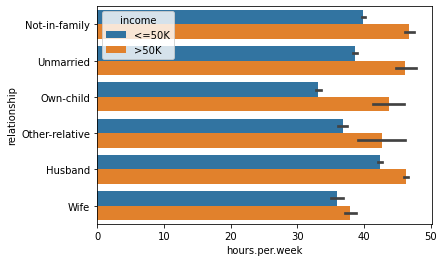

In [81]:
sns.barplot(x='hours.per.week',y='relationship', data = census, hue='income')
plt.show()

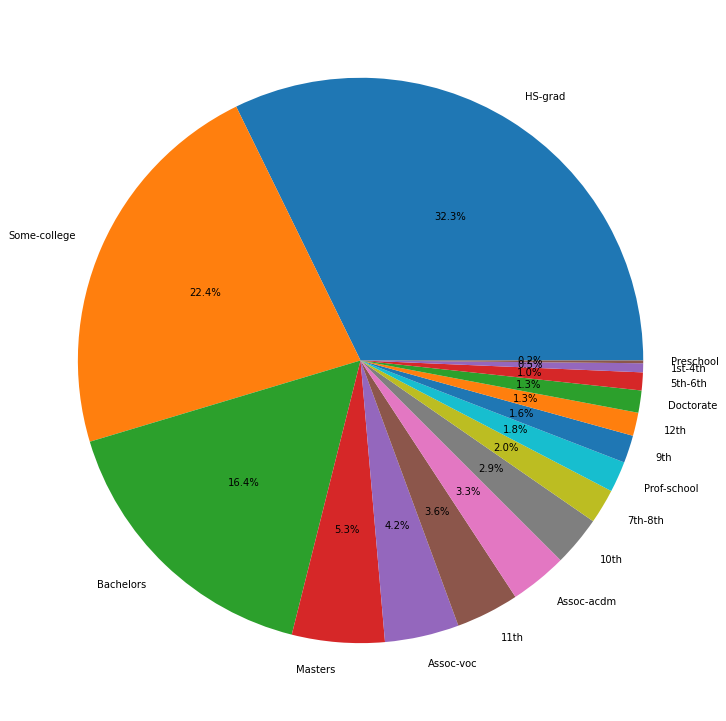

In [86]:
plt.figure(figsize = (13,13))
plt.pie(list(census['education'].value_counts()),labels = list(census['education'].value_counts().keys()), autopct="%0.1f%%" )
plt.show()


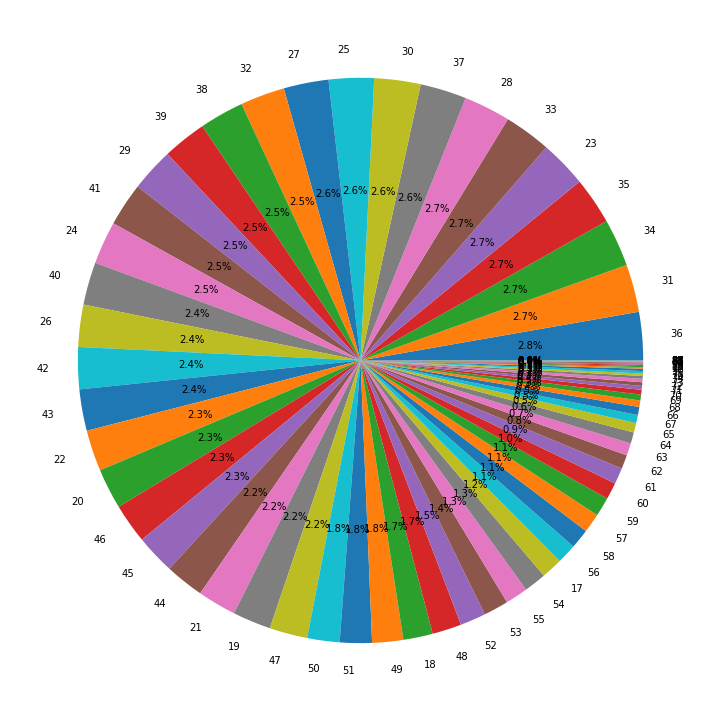

In [87]:
plt.figure(figsize = (13,13))
plt.pie(list(census['age'].value_counts()),labels = list(census['age'].value_counts().keys()), autopct="%0.1f%%" )
plt.show()


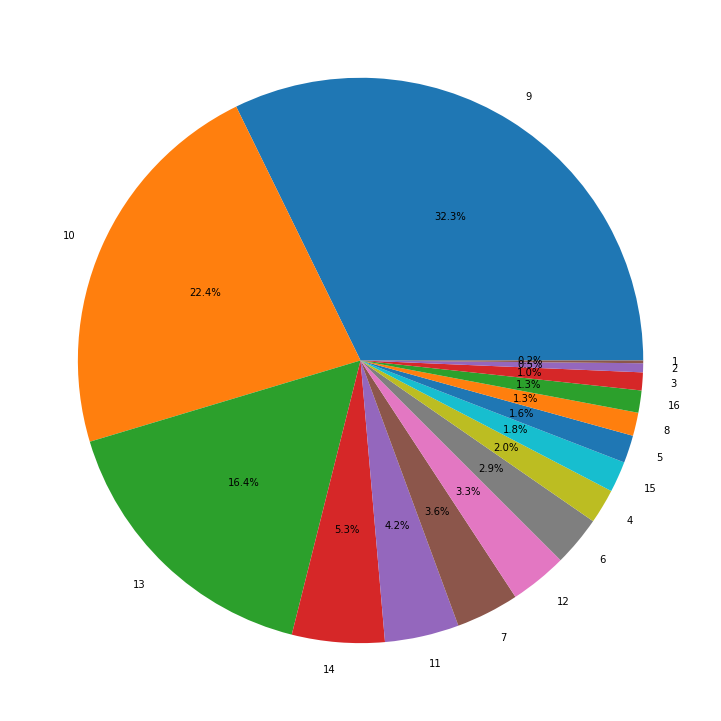

In [88]:
plt.figure(figsize = (13,13))
plt.pie(list(census['education.num'].value_counts()),labels = list(census['education.num'].value_counts().keys()), autopct="%0.1f%%" )
plt.show()

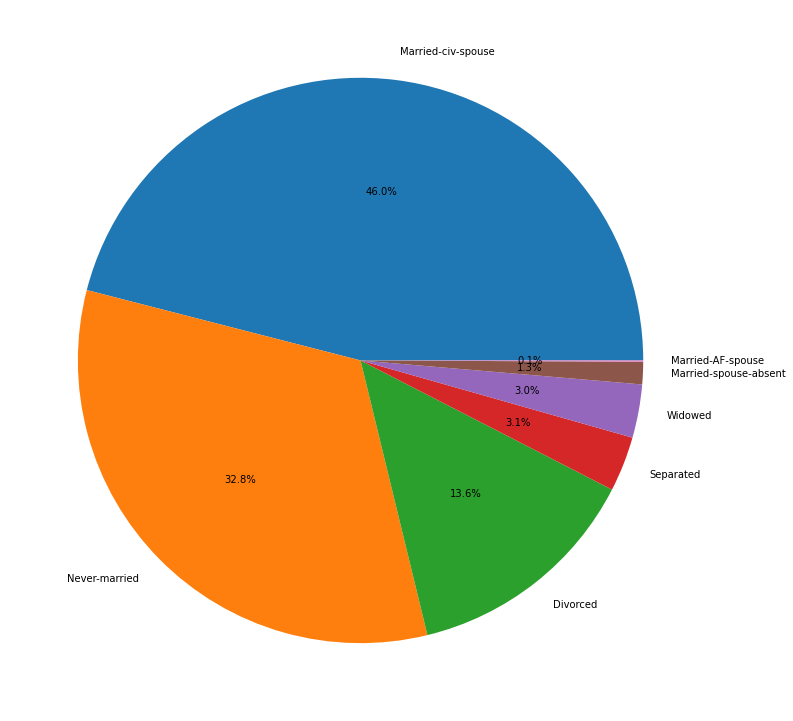

In [90]:
plt.figure(figsize = (13,13))
plt.pie(list(census['marital.status'].value_counts()),labels = list(census['marital.status'].value_counts().keys()),
        autopct="%0.1f%%" )
plt.show()

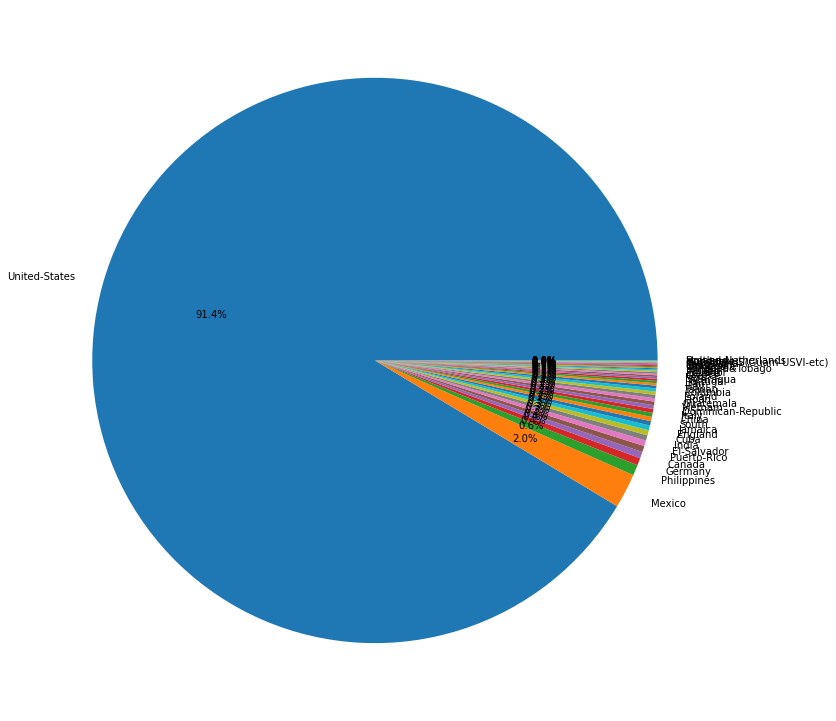

In [92]:
plt.figure(figsize = (13,13))
plt.pie(list(census['native.country'].value_counts()),labels = list(census['native.country'].value_counts().keys()), 
        autopct="%0.1f%%" )
plt.show()


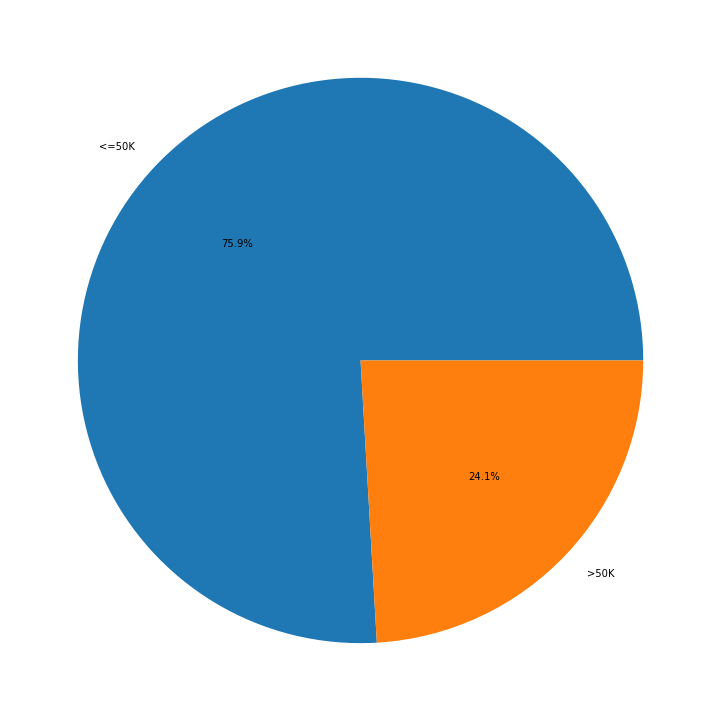

In [93]:
plt.figure(figsize = (13,13))
plt.pie(list(census['income'].value_counts()),labels = list(census['income'].value_counts().keys()), autopct="%0.1f%%" )
plt.show()


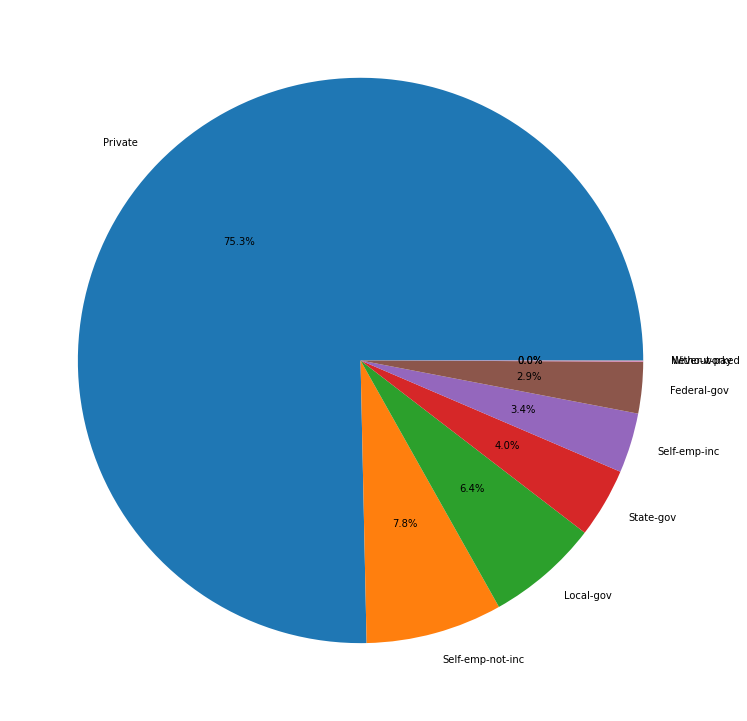

In [94]:
plt.figure(figsize = (13,13))
plt.pie(list(census['workclass'].value_counts()),labels = list(census['workclass'].value_counts().keys()), autopct="%0.1f%%" )
plt.show()

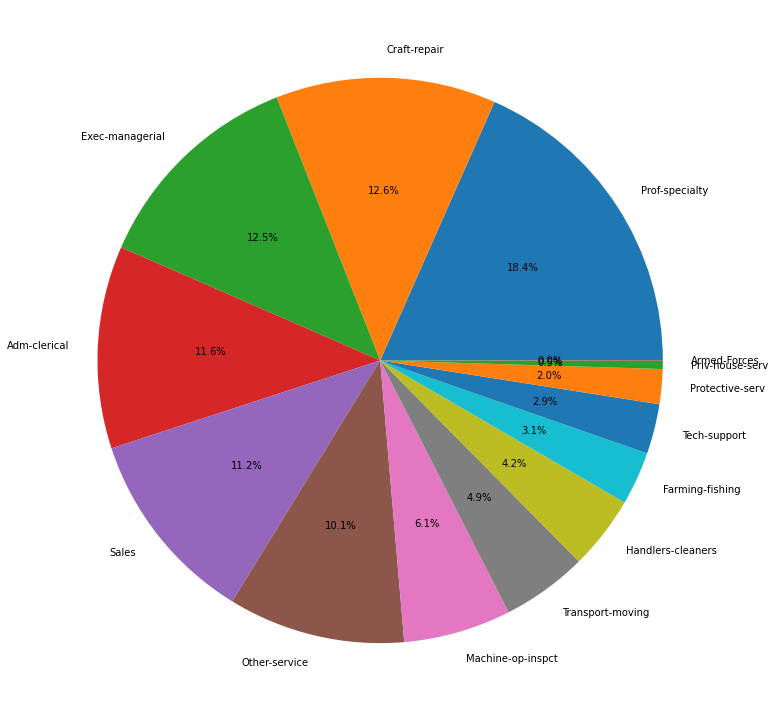

In [95]:
plt.figure(figsize = (13,13))
plt.pie(list(census['occupation'].value_counts()),labels = list(census['occupation'].value_counts().keys()), autopct="%0.1f%%" )
plt.show()


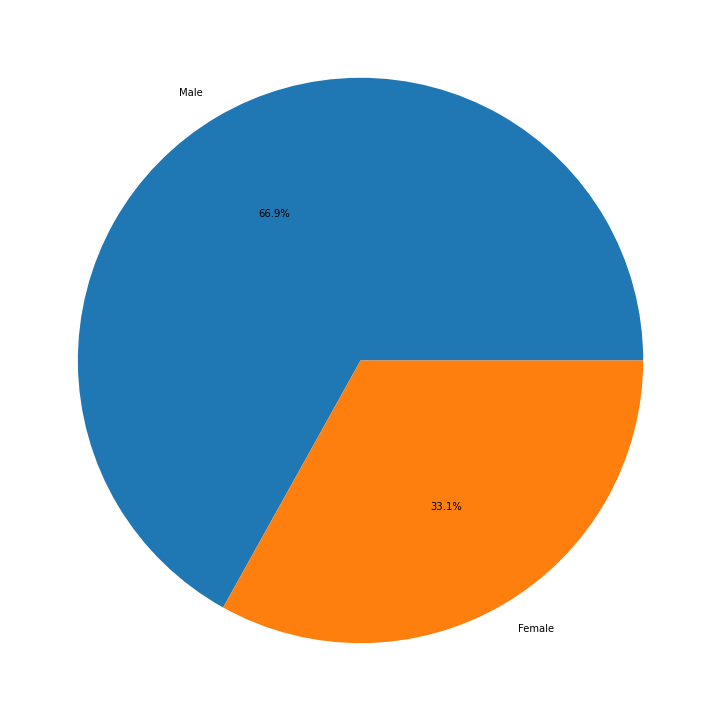

In [96]:
plt.figure(figsize = (13,13))
plt.pie(list(census['sex'].value_counts()),labels = list(census['sex'].value_counts().keys()), autopct="%0.1f%%" )
plt.show()


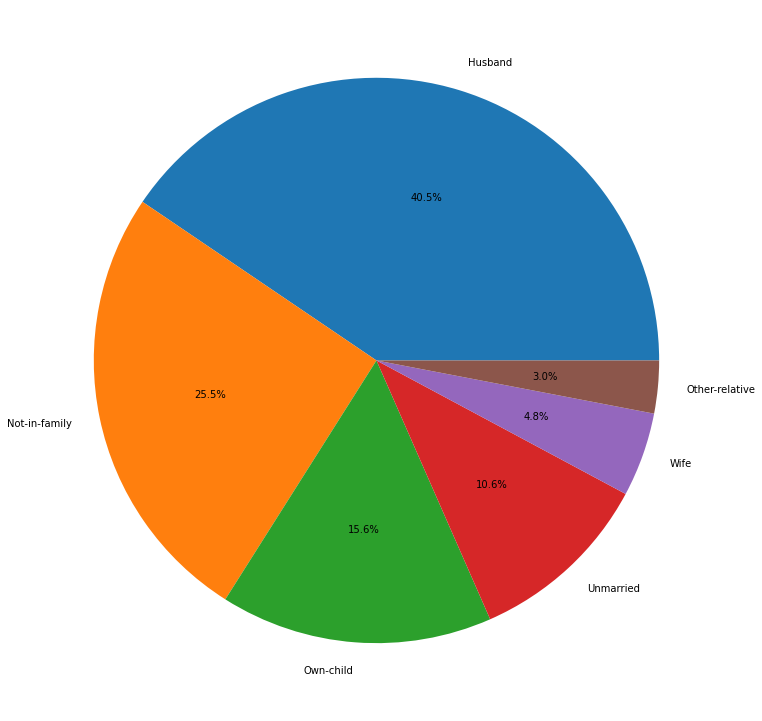

In [97]:
plt.figure(figsize = (13,13))
plt.pie(list(census['relationship'].value_counts()),labels = list(census['relationship'].value_counts().keys()), autopct="%0.1f%%" )
plt.show()


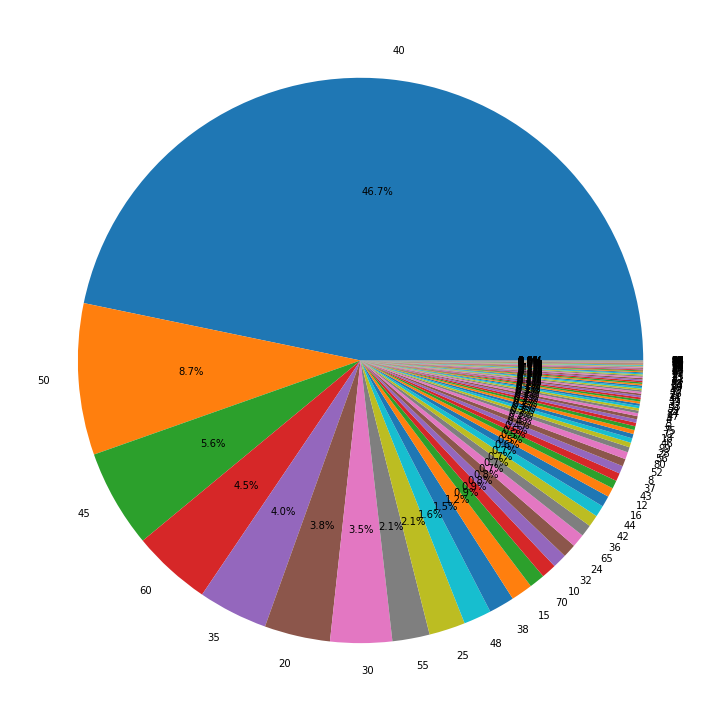

In [98]:
plt.figure(figsize = (13,13))
plt.pie(list(census['hours.per.week'].value_counts()),labels = list(census['hours.per.week'].value_counts().keys()), autopct="%0.1f%%" )
plt.show()


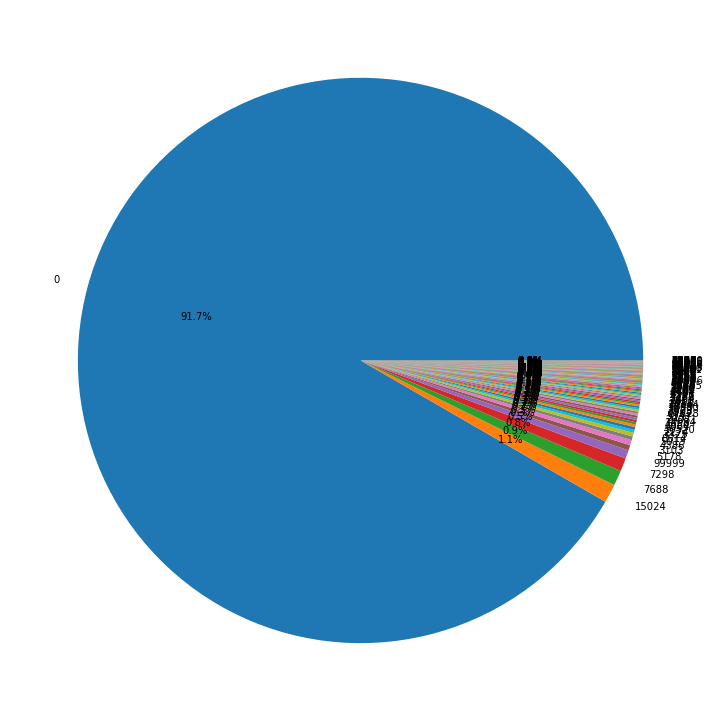

In [100]:
plt.figure(figsize = (13,13))
plt.pie(list(census['capital.gain'].value_counts()),labels = list(census['capital.gain'].value_counts().keys()), autopct="%0.1f%%" )
plt.show()

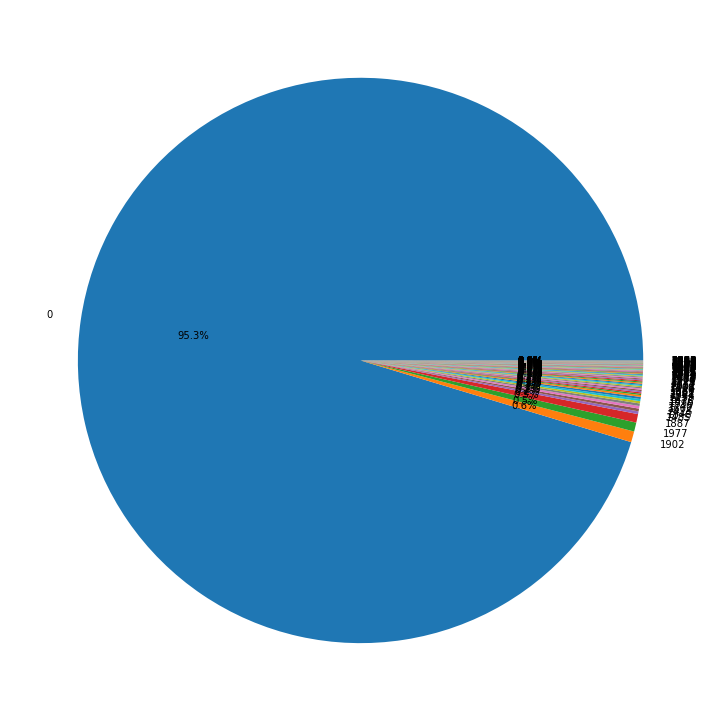

In [101]:
plt.figure(figsize = (13,13))
plt.pie(list(census['capital.loss'].value_counts()),labels = list(census['capital.loss'].value_counts().keys()), autopct="%0.1f%%" )
plt.show()

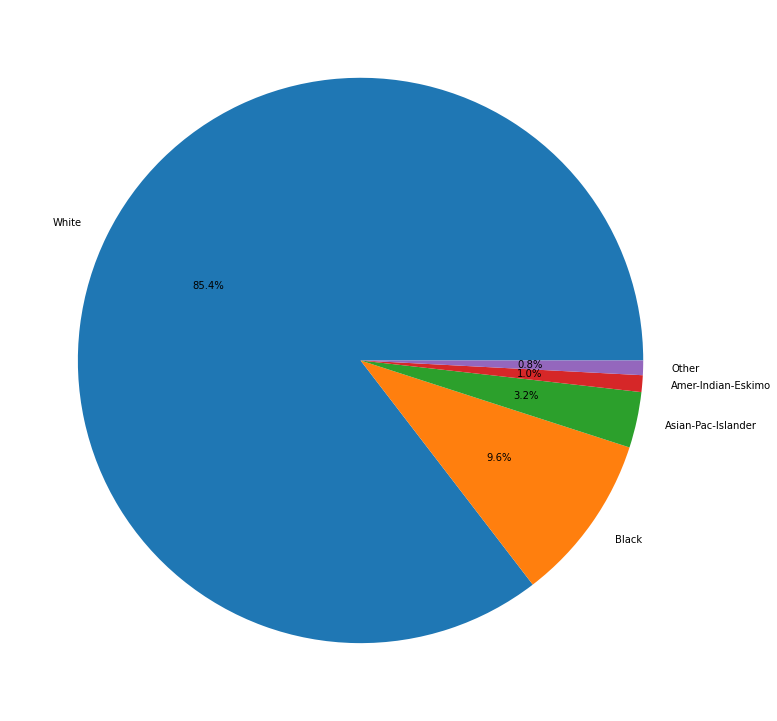

In [156]:
plt.figure(figsize = (13,13))
plt.pie(list(census['race'].value_counts()),labels = list(census['race'].value_counts().keys()), autopct="%0.1f%%" )
plt.show()

# Modelling

In [134]:
feature_cols = ['age', 'education.num','capital.loss','capital.gain'
                , 'hours.per.week', ]
X = census[feature_cols] # Features
y = census.income # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n ",
confusion_matrix(y_test, y_pred))

print ("\nAccuracy : ",
accuracy_score(y_test,y_pred)*100)

print("\nReport : ",
classification_report(y_test, y_pred))

Accuracy: 0.8156413143617566

Confusion Matrix:
  [[6853  515]
 [1286 1115]]

Accuracy :  81.56413143617566

Report :                precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      7368
        >50K       0.68      0.46      0.55      2401

    accuracy                           0.82      9769
   macro avg       0.76      0.70      0.72      9769
weighted avg       0.80      0.82      0.80      9769



In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "gini",
random_state = 100,max_depth=3, min_samples_leaf=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n ",
confusion_matrix(y_test, y_pred))

print ("\nAccuracy : ",
accuracy_score(y_test,y_pred)*100)

print("\nReport : ",
classification_report(y_test, y_pred))

Accuracy: 0.8023339133995291

Confusion Matrix:
  [[7363    5]
 [1926  475]]

Accuracy :  80.2333913399529

Report :                precision    recall  f1-score   support

       <=50K       0.79      1.00      0.88      7368
        >50K       0.99      0.20      0.33      2401

    accuracy                           0.80      9769
   macro avg       0.89      0.60      0.61      9769
weighted avg       0.84      0.80      0.75      9769



In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n ",
confusion_matrix(y_test, y_pred))

print ("\nAccuracy : ",
accuracy_score(y_test,y_pred)*100)

print("\nReport : ",
classification_report(y_test, y_pred))

Accuracy: 0.8209642747466476

Confusion Matrix:
  [[6840  567]
 [1182 1180]]

Accuracy :  82.09642747466475

Report :                precision    recall  f1-score   support

       <=50K       0.85      0.92      0.89      7407
        >50K       0.68      0.50      0.57      2362

    accuracy                           0.82      9769
   macro avg       0.76      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769



In [139]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=1)

In [144]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

age               0.322942
capital.gain      0.220044
hours.per.week    0.187185
education.num     0.186264
capital.loss      0.083565
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


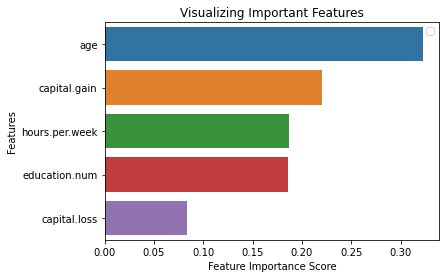

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [150]:
# Feature scaling to the training and test set of independent variables for reducing the size to smaller values
from sklearn.preprocessing import StandardScaler
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

sc = StandardScaler()

X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

# Now we have to create and train the K Nearest Neighbor model with the training set
from sklearn.neighbors import KNeighborsClassifier

classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier1.fit(X1_train, y1_train)
# Let’s predict the test results
y1_pred = classifier1.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("\nConfusion Matrix:\n ",
confusion_matrix(y1_test, y1_pred))

print ("\nAccuracy : ",
accuracy_score(y1_test,y1_pred)*100)

print("\nReport : ",
classification_report(y1_test, y1_pred))

Accuracy: 0.8106254478452247

Confusion Matrix:
  [[6856  554]
 [1296 1063]]

Accuracy :  81.06254478452247

Report :                precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      7410
        >50K       0.66      0.45      0.53      2359

    accuracy                           0.81      9769
   macro avg       0.75      0.69      0.71      9769
weighted avg       0.80      0.81      0.80      9769



In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)
from sklearn.naive_bayes import GaussianNB

classifier1 = GaussianNB()
classifier1.fit(X1_train, y1_train)

y1_pred = classifier1.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("\nConfusion Matrix:\n ",
confusion_matrix(y1_test, y1_pred))

print ("\nAccuracy : ",
accuracy_score(y1_test,y1_pred)*100)

print("\nReport : ",
classification_report(y1_test, y1_pred))

Accuracy: 0.7954754836728427

Confusion Matrix:
  [[7043  367]
 [1631  728]]

Accuracy :  79.54754836728426

Report :                precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      7410
        >50K       0.66      0.31      0.42      2359

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



In [155]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost Classifer
model1 = abc.fit(X1_train, y1_train)
y1_pred = classifier1.predict(X1_test)

print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("\nConfusion Matrix:\n ",
confusion_matrix(y1_test, y1_pred))

print ("\nAccuracy : ",
accuracy_score(y1_test,y1_pred)*100)

print("\nReport : ",
classification_report(y1_test, y1_pred))

Accuracy: 0.7954754836728427

Confusion Matrix:
  [[7043  367]
 [1631  728]]

Accuracy :  79.54754836728426

Report :                precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      7410
        >50K       0.66      0.31      0.42      2359

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769

